In [78]:
import os
import re
import pandas as pd

from matplotlib import pyplot as plt


In [79]:
tests_path = 'tests/'
files = os.listdir(tests_path)
files


['node-1-workers.csv',
 'node-10-workers.csv',
 'node-12-workers.csv',
 'node-2-workers.csv',
 'node-4-workers.csv',
 'node-6-workers.csv',
 'node-8-workers.csv']

In [80]:
df = pd.DataFrame()
for file in files:
  numWorkes = re.search(r'node-(\d+)-workers.csv', file)
  temp = pd.read_csv(tests_path + file, index_col=0)
  temp['createdAt'] = pd.to_datetime(temp['createdAt'])
  tempo_inicial = temp['createdAt'].min()
  temp['createdAt'] = (temp['createdAt'] - tempo_inicial).dt.total_seconds()
  temp['workers'] = numWorkes.group(1)
  temp['workers'] = temp['workers'].astype(int)
  df = pd.concat([df, temp])


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 1 to 100000
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   nome       700000 non-null  object 
 1   descricao  700000 non-null  object 
 2   valores    700000 non-null  object 
 3   createdAt  700000 non-null  float64
 4   workers    700000 non-null  int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 29.4+ MB


In [82]:
df.head()

,nome,descricao,valores,createdAt,workers
id,,,,,
1,User 1,Descrição do usuário 1,"108, 108, 175, 114",0.0,1
2,User 4,Descrição do usuário 4,"142, 197, 187, 122",0.0,1
3,User 6,Descrição do usuário 6,"111, 173, 187, 177",0.0,1
4,User 7,Descrição do usuário 7,"192, 188, 151, 118",0.0,1
5,User 8,Descrição do usuário 8,"148, 170, 108, 167",0.0,1


In [83]:
df['workers'].value_counts()

1     100000
10    100000
12    100000
2     100000
4     100000
6     100000
8     100000
Name: workers, dtype: int64

In [85]:
df = df.sort_values(by=['workers', 'createdAt'])

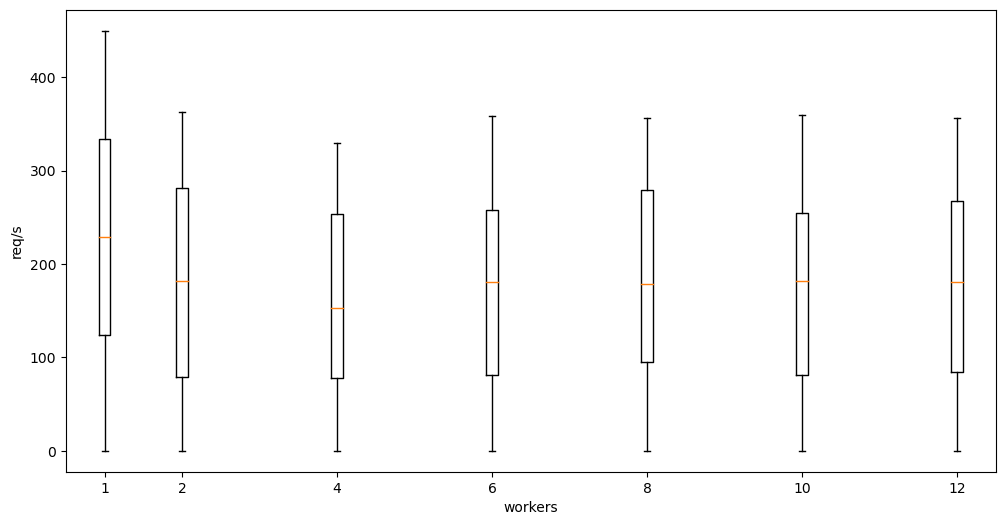

In [92]:
# Lista de valores únicos em "workers"
unique_workers = df['workers'].unique()

# Criar um box plot para cada valor único de "workers"
plt.figure(figsize=(12, 6))
for worker in unique_workers:
    subset = df[df['workers'] == worker]
    plt.boxplot(subset['createdAt'], positions=[worker], labels=[str(worker)])

plt.ylabel('req/s')
plt.xlabel('workers')
plt.show()
